# –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –∑–æ–ª–æ—Ç–∞ –∏–∑ —Ä—É–¥—ã

**–ó–∞–¥–∞—á–∞:** –ø—Ä–æ—Ç–æ—Ç–∏–ø –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.
–ú–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∑–æ–ª–æ—Ç–∞ –∏–∑ –∑–æ–ª–æ—Ç–æ—Å–æ–¥–µ—Ä–∂–∞—â–µ–π —Ä—É–¥—ã. 
–ú–æ–¥–µ–ª—å –ø–æ–º–æ–∂–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ, —á—Ç–æ–±—ã –Ω–µ –∑–∞–ø—É—Å–∫–∞—Ç—å –ø—Ä–µ–¥–ø—Ä–∏—è—Ç–∏–µ —Å —É–±—ã—Ç–æ—á–Ω—ã–º–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º–∏.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mitosheet as mt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

**–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [3]:
df = pd.read_csv('/datasets/gold_recovery_full_new.csv') # –ø–æ–ª–Ω–∞—è
train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # –æ–±—É—á–∞—è—é—â–∞—è
test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # —Ç–µ—Å—Ç–æ–≤–∞—è

**–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤**

In [4]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {len(train)}\n',
    f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {len(test)}\n',
    f'–°—É–º–º–∞ –≤—ã–±–æ—Ä–æ–∫: {len(train) + len(test)}\n',
    f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ (–∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–∞—è —Å—É–º–º–∞):{len(df)}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 14149
 –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: 5290
 –°—É–º–º–∞ –≤—ã–±–æ—Ä–æ–∫: 19439
 –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ (–∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–∞—è —Å—É–º–º–∞):19439


In [5]:
df.shape

(19439, 87)

In [6]:
df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Rougher feed ‚Äî –∏—Å—Ö–æ–¥–Ω–æ–µ —Å—ã—Ä—å–µ  
Rougher additions (–∏–ª–∏ reagent additions) ‚Äî —Ñ–ª–æ—Ç–∞—Ü–∏–æ–Ω–Ω—ã–µ —Ä–µ–∞–≥–µ–Ω—Ç—ã: Xanthate, Sulphate, Depressant  
Rougher process (–∞–Ω–≥–ª. ¬´–≥—Ä—É–±—ã–π –ø—Ä–æ—Ü–µ—Å—Å¬ª) ‚Äî —Ñ–ª–æ—Ç–∞—Ü–∏—è  
Rougher tails ‚Äî –æ—Ç–≤–∞–ª—å–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã  
Float banks ‚Äî —Ñ–ª–æ—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è —É—Å—Ç–∞–Ω–æ–≤–∫–∞  
Cleaner process ‚Äî –æ—á–∏—Å—Ç–∫–∞  
Rougher Au ‚Äî —á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –∑–æ–ª–æ—Ç–∞  
Final Au ‚Äî —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –∑–æ–ª–æ—Ç–∞  
air amount ‚Äî –æ–±—ä—ë–º –≤–æ–∑–¥—É—Ö–∞  
fluid levels ‚Äî —É—Ä–æ–≤–µ–Ω—å –∂–∏–¥–∫–æ—Å—Ç–∏  
feed size ‚Äî —Ä–∞–∑–º–µ—Ä –≥—Ä–∞–Ω—É–ª —Å—ã—Ä—å—è  
feed rate ‚Äî —Å–∫–æ—Ä–æ—Å—Ç—å –ø–æ–¥–∞—á–∏  
rougher ‚Äî —Ñ–ª–æ—Ç–∞—Ü–∏—è  
primary_cleaner ‚Äî –ø–µ—Ä–≤–∏—á–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞  
secondary_cleaner ‚Äî –≤—Ç–æ—Ä–∏—á–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞  
final ‚Äî —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏  
input ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å—ã—Ä—å—è  
output ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø—Ä–æ–¥—É–∫—Ç–∞  
state ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—â–∏–µ —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —ç—Ç–∞–ø–∞  
calculation ‚Äî —Ä–∞—Å—á—ë—Ç–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏  

–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–∫–∞–∑–∞–Ω–æ –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É _—ç—Ç–∞–ø_—Ç–∏–ø_–ø–∞—Ä–∞–º–µ—Ç—Ä–∞_–Ω–∞–∑–≤–∞–Ω–∏–µ_–ø–∞—Ä–∞–º–µ—Ç—Ä–∞  

–¶–µ–ª–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
    rougher.output.recovery;
    final.output.recovery.

In [7]:
train.shape, test.shape

((14149, 87), (5290, 53))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ —Ç–µ—Å—Ç–µ –∏ —Ç—Ä–µ–π–Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è. –í—ã—è—Å–Ω–∏–º –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ –ø–æ–ø–∞–ª–∏ –≤ —Ç–µ—Å—Ç.

In [8]:
lst_3 = [] 

for i in train.columns:  
    if i not in test.columns:  
        lst_3.append(i) 
print(lst_3)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ **output** - –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø—Ä–æ–¥—É–∫—Ç–æ–≤, **calculation** - —Ä–∞—Å—á—ë—Ç–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏.  
–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç —Ü–µ–ª–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

**–î—É–±–ª–∏–∫–∞—Ç—ã**

In [9]:
mydups = df.duplicated().sum()
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ', mydups)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ 0


**–ü–µ—Ä–∏–æ–¥ –≤—Ä–µ–º–µ–Ω–∏**

In [12]:
print('–î–∞–Ω–Ω—ã–µ –¥–æ—Å—Ç—É–ø–Ω—ã –∑–∞ –ø–µ—Ä–∏–æ–¥ –æ—Ç', pd.to_datetime(df['date'].min()), '–¥–æ', pd.to_datetime(df['date'].max()))

–î–∞–Ω–Ω—ã–µ –¥–æ—Å—Ç—É–ø–Ω—ã –∑–∞ –ø–µ—Ä–∏–æ–¥ –æ—Ç 2016-01-15 00:00:00 –¥–æ 2018-08-18 10:59:59


**–ü—Ä–æ–≤–µ—Ä–∫–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–±–æ–≥–∞—â–µ–Ω–∏—è –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ**

In [13]:
def check(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    
    check = (((C * (F-T))) / (F * (C-T)))*100
    return check

In [14]:
train_recovery = train [['rougher.output.concentrate_au', 
                    'rougher.input.feed_au', 
                    'rougher.output.tail_au',
                    'rougher.output.recovery']].copy()
train_recovery = train_recovery.dropna(axis=0)
train_recovery['test_recovery'] = train_recovery.apply(check, axis=1)
train_recovery.head(7)

rougher.output.concentrate_au  rougher.input.feed_au  \
0                      19.793808               6.486150   
1                      20.050975               6.478583   
2                      19.737170               6.362222   
3                      19.320810               6.118189   
4                      19.216101               5.663707   
5                      18.950385               5.687168   
6                      19.319591               6.038436   

   rougher.output.tail_au  rougher.output.recovery  test_recovery  
0                1.170244                87.107763      87.107763  
1                1.184827                86.843261      86.843261  
2                1.162562                86.842308      86.842308  
3                1.079755                87.226430      87.226430  
4                1.012642                86.688794      86.688794  
5                0.915835                88.156912      88.156912  
6                0.986248                88.168065      88.168065

In [15]:
MAE = mean_absolute_error(train_recovery['rougher.output.recovery'], train_recovery['test_recovery'])
print('–ú–ê–ï: {:.17f}'.format(MAE))

–ú–ê–ï: 0.00000000000000974


–û—à–∏–±–∫–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞, –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.

### –û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [17]:
pd.DataFrame(round(train.isna().mean()*100,1)).style.background_gradient('prism')

### –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [19]:
pd.DataFrame(round(test.isna().mean()*100,1)).style.background_gradient('prism')

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–æ–∫ –ø–æ –ø—Ä–æ—Ü–µ—Å—Å–∞–º

In [20]:
X_train = train[test.columns]
rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols]
X_test_rougher = test.loc[:, rougher_cols]
y_train_rougher = train[['rougher.output.recovery']]
X_train_rougher.columns

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],
      dtype='object')

In [21]:
final_cols = X_train.columns.str.contains('cleaner')
X_train_final = X_train.loc[:, final_cols]
X_test_final = test.loc[:, final_cols]
y_train_final = train[['final.output.recovery']]
X_train_final.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.

In [22]:
X_train_rougher.shape, y_train_rougher.shape, X_test_rougher.shape

((14149, 22), (14149, 1), (5290, 22))

In [23]:
X_train_final.shape, y_train_final.shape, X_test_final.shape

((14149, 30), (14149, 1), (5290, 30))

**–í—ã–≤–æ–¥**  
–î–∞–Ω–æ —Ç—Ä–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞:
- data
- train
- test 

–í —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –≤ –æ–±—É—á–∞—é—â–µ–π. –¢–∞–∫–∂–µ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –Ω–µ—Ç —Ü–µ–ª–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏ —Å–æ –≤—Å–µ–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. 

–û–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É–µ –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–¥–µ–ª–∏–ª–∏ –Ω–∞ –¥–≤–µ - –¥–ª—è —ç—Ç–∞–ø–∞ —Ñ–ª–æ—Ç–∞—Ü–∏–∏ –∏ –¥–ª—è —ç—Ç–∞–ø–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç.

–í —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:  

*['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au']*

**output** - –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø—Ä–æ–¥—É–∫—Ç–æ–≤  
**calculation** - —Ä–∞—Å—á—ë—Ç–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏  
–í–µ—Ä–æ—è—Ç–Ω–æ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø–æ —ç—Ç–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –Ω–∞ –≤—ã—Ö–æ–¥–µ –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –∏ –¥–æ—Å—Ç—É–ø–Ω—ã –ø–æ—Å–ª–µ —ç—Ç–∞–ø–∞ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞

## –ê–Ω–∞–ª–∏–∑

–°–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–π —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

In [24]:
elements = {'–∑–æ–ª–æ—Ç–æ': 'au', '—Å–µ—Ä–µ–±—Ä–æ': 'ag', '—Å–≤–∏–Ω–µ—Ü': 'pb'}

### –ö–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –º–µ—Ç–∞–ª–ª–æ–≤

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–æ–≥—É—Ç –ø–æ–Ω—è—Ç—å –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—é –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö

In [25]:
def fraction(elem):
    
    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    fig_dims = (15, 10)
    fig1, ax1 = plt.subplots(figsize=fig_dims) 
    for col in cols:
                
        sns.kdeplot(train[col], shade=True, alpha=.42, ax=ax1)
        plt.title('–ö–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –º–µ—Ç–∞–ª–ª–∞ ' + str(elem).title() + ' –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö –æ—á–∏—Å—Ç–∫–∏', fontsize=15)
def boxplot(elem):

    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    plt.figure(figsize=(15,10))
    sns.boxplot(data=df[cols], linewidth=0.42, palette="Set2")
    plt.title('–ö–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –º–µ—Ç–∞–ª–ª–∞ ' + str(elem).title() + ' –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö –æ—á–∏—Å—Ç–∫–∏', fontsize=15)

**–ó–æ–ª–æ—Ç–æ**

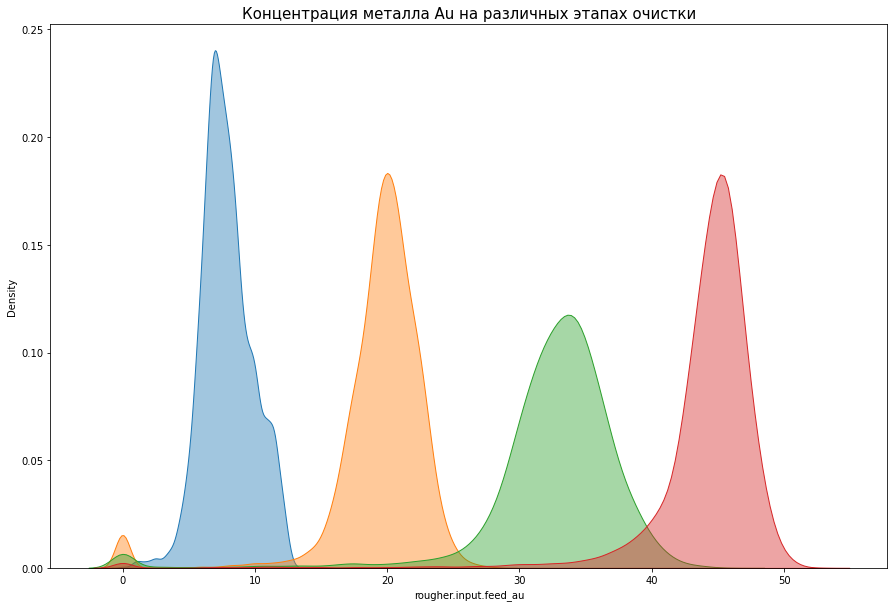

In [26]:
fraction(elements['–∑–æ–ª–æ—Ç–æ'])

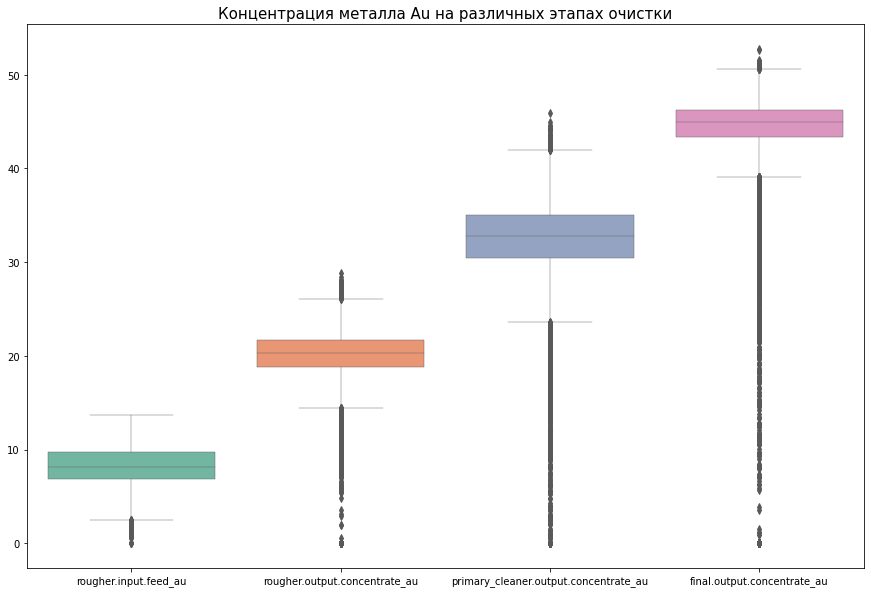

In [27]:
boxplot(elements['–∑–æ–ª–æ—Ç–æ'])

**–í—ã–≤–æ–¥:** –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∑–æ–ª–æ—Ç–∞ –ø–æ–≤—ã—à–∞–µ—Ç—Å—è –ø–æ—ç—Ç–∞–ø–Ω–æ  –∏ –¥–æ—Å—Ç–∏–≥–∏–∞–µ—Ç —Å–≤–æ–∏—Ö –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–Ω—Ü–µ –ø—Ä–æ—Ü–µ—Å—Å–∞

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í–µ—Ä–Ω–æ!üëç:\
</b> –ú–Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –±—ã–ª–æ –∏–∑—É—á–∏—Ç—å —Ç–≤–æ–∏ –≥—Ä–∞—Ñ–∏–∫–∏, –ø—Ä–∞–∫—Ç–∏—á–Ω—ã–π –∏ –∫—Ä–∞—Å–æ—á–Ω—ã–π –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑. 

**–°–µ—Ä–µ–±—Ä–æ**

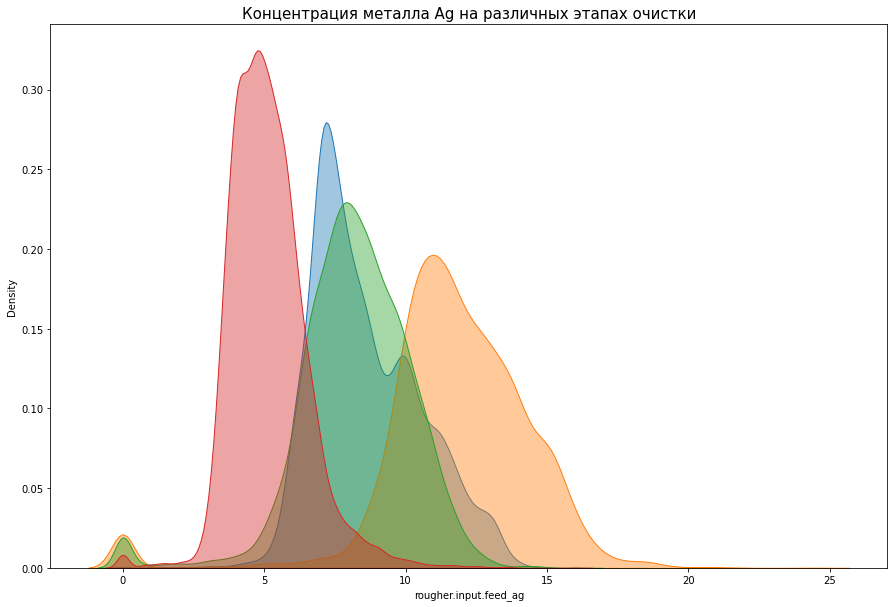

In [28]:
fraction(elements['—Å–µ—Ä–µ–±—Ä–æ'])

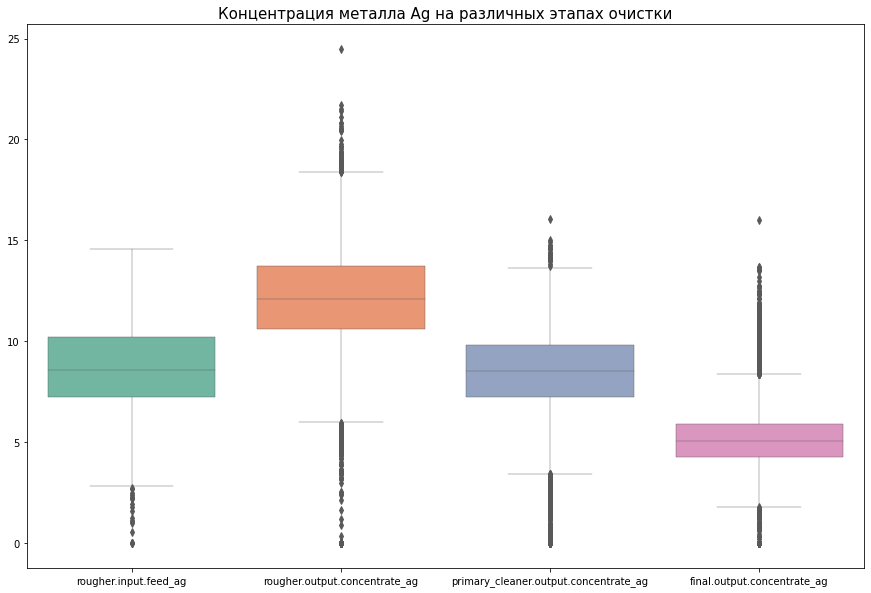

In [29]:
boxplot(elements['—Å–µ—Ä–µ–±—Ä–æ'])

**–í—ã–≤–æ–¥**: –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è —Å–µ—Ä–µ–±—Ä–∞ –ø–æ–≤—ã—à–∞–µ—Ç—Å—è –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç—Ç–∞–ø–∞ —Ñ–ª–æ—Ç–∞—Ü–∏–∏ –Ω–æ –Ω–∞—á–∏–Ω–∞–µ—Ç —Å–Ω–∏–∂–∞—Ç—å—Å—è –¥–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å–æ –≤—Å–µ–º–∏ —ç—Ç–∞–ø–∞–º–∏

**–°–≤–∏–Ω–µ—Ü**

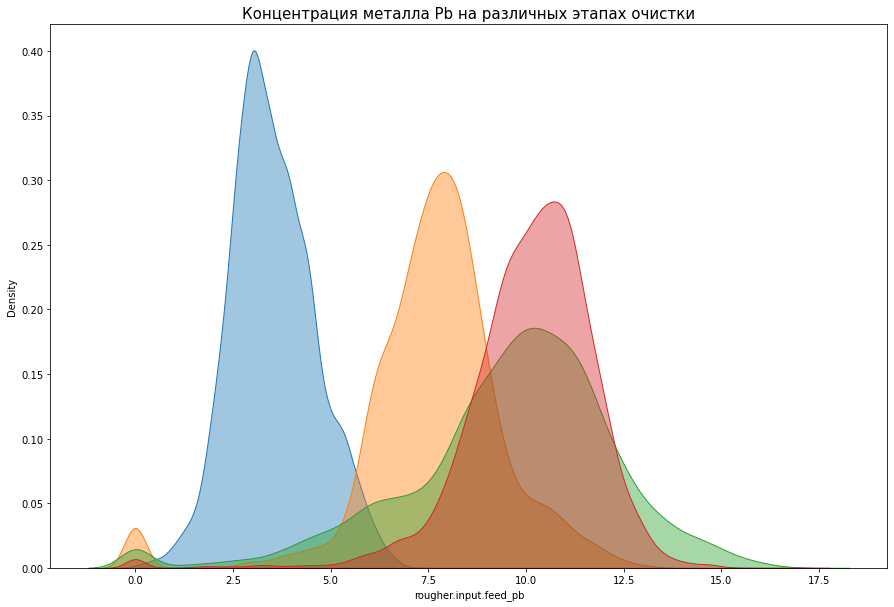

In [30]:
fraction(elements['—Å–≤–∏–Ω–µ—Ü'])

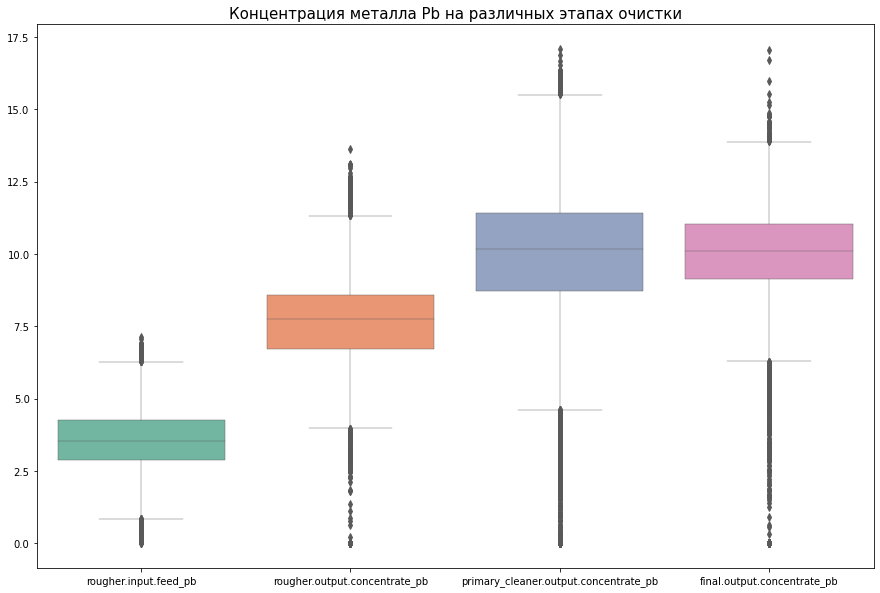

In [31]:
boxplot(elements['—Å–≤–∏–Ω–µ—Ü'])

**–í—ã–≤–æ–¥**: —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Å–≤–∏–Ω—Ü–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–æ–¥–Ω–∏–º–∞—Ç—å—Å—è –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç–∞—Ç–∞–ø–∞ —Ñ–ª–æ—Ç–∞—Ü–∏–∏ –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –ª–∏–±–æ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —ç—Ç–∞–ø–∞—Ö –æ—á–∏—Å—Ç–∫–∏

### –†–∞–∑–º–µ—Ä—ã –≥—Ä–∞–Ω—É–ª

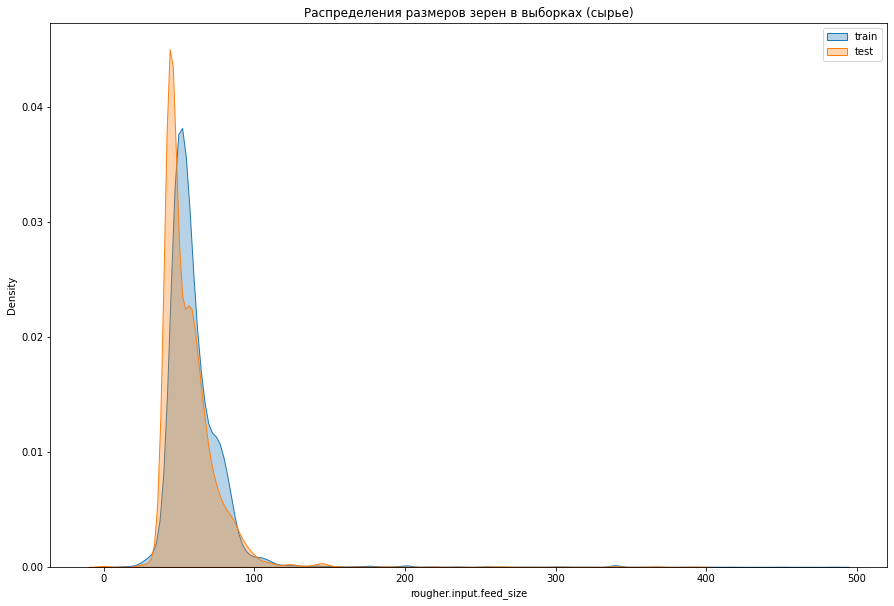

In [32]:
plt.figure(figsize=(15,10))
sns.kdeplot(train['rougher.input.feed_size'].dropna(), label='train', shade=True, alpha=.33)
sns.kdeplot(test['rougher.input.feed_size'].dropna(), label='test', shade=True, alpha=.33)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–æ–≤ –∑–µ—Ä–µ–Ω –≤ –≤—ã–±–æ—Ä–∫–∞—Ö (—Å—ã—Ä—å–µ)')
plt.legend()
plt.show()

**–í—ã–≤–æ–¥**: —Ä–∞–∑–º–µ—Ä—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º —É—Ä–æ–≤–Ω–µ.

### –°—É–º–º–∞—Ä–Ω–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è

In [33]:
crude = 'rougher.input.feed_'
crude_out = 'rougher.output.concentrate_'
prim_clean = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'

df['—Å—ã—Ä—å–µ'] = df[[crude+'au', crude+'ag', crude+'pb']].sum(axis=1)
df['—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç'] = df[[crude_out+'au', crude_out+'ag', crude_out+'pb']].sum(axis=1)
df['–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏'] = df[[prim_clean+'au', prim_clean+'ag', prim_clean+'pb']].sum(axis=1)
df['—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç'] = df[[final+'au', final+'ag', final+'pb']].sum(axis=1)
df[['—Å—ã—Ä—å–µ', '—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç', '–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏', '—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç']].head()

—Å—ã—Ä—å–µ  —á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç  –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏  \
0  14.871440            38.395653                 53.111627   
1  14.905729            38.945647                 53.174338   
2  14.638299            38.649756                 52.927464   
3  14.199305            38.411473                 43.979185   
4  13.511497            38.867359                 52.121146   

   —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç  
0             58.137072  
1             58.699942  
2             58.927421  
3             58.714815  
4             59.065251

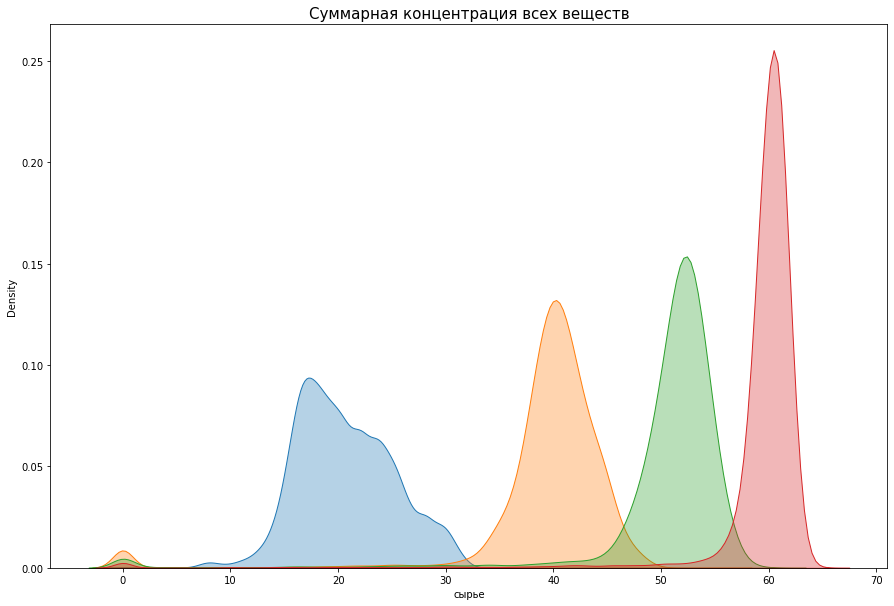

In [34]:
col_1 = ['—Å—ã—Ä—å–µ', '—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç', '–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏', '—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç']

fig_dims = (15, 10)
fig1, ax1 = plt.subplots(figsize=fig_dims) 
for col in col_1:
                
    sns.kdeplot(df[col], shade=True, alpha=.33, ax=ax1)
    plt.title('–°—É–º–º–∞—Ä–Ω–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –≤—Å–µ—Ö –≤–µ—â–µ—Å—Ç–≤', fontsize=15)

In [35]:
df[['—Å—ã—Ä—å–µ', '—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç', '–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏', '—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç']].describe().T

count       mean       std   min        25%  \
—Å—ã—Ä—å–µ                     19439.0  20.640600  4.494362  0.03  17.252879   
—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç       19439.0  39.373032  6.863389  0.00  38.394639   
–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏  19439.0  50.332682  7.671672  0.00  50.038524   
—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç      19439.0  59.223099  6.097603  0.00  59.298323   

                                50%        75%        max  
—Å—ã—Ä—å–µ                     20.141216  23.797381  33.498784  
—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç       40.312648  42.365102  55.568687  
–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏  51.905758  53.386172  60.269003  
—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç      60.306921  61.096667  64.968881

**–í—ã–≤–æ–¥**  
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–∏ –º–µ—Ç–∞–ª–ª–æ–≤ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å—Ç–∞–¥–∏—è—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞:

**–∑–æ–ª–æ—Ç–æ:**   
–ø–æ–≤—ã—à–∞–µ—Ç—Å—è –ø–æ –º–µ—Ä–µ –æ—á–∏—Å—Ç–∫–∏ –∏ –¥–æ—Å—Ç–∏–≥–∏–∞–µ—Ç —Å–≤–æ–∏—Ö –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–Ω—Ü–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞  
**—Å–µ—Ä–µ–±—Ä–æ:**   
–ø–æ–≤—ã—à–∞–µ—Ç—Å—è –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç—Ç–∞–ø–∞ —Ñ–ª–æ—Ç–∞—Ü–∏–∏ –∏ –ø–æ –º–µ—Ä–µ –æ—á–∏—Å—Ç–∏–∫–∏ –Ω–∞—á–∏–∞–Ω–µ—Ç —Å–Ω–∏–∂–∞—Ç—å—Å—è  
**—Å–≤–∏–Ω–µ—Ü:**   
—Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Å–≤–∏–Ω—Ü–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–æ–¥–Ω–∏–º–∞—Ç—å—Å—è –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç–∞—Ç–∞–ø–∞ —Ñ–ª–æ—Ç–∞—Ü–∏–∏ –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –ª–∏–±–æ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —ç—Ç–∞–ø–∞—Ö –æ—á–∏—Å—Ç–∫–∏


–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã –≤—ã–±—Ä–æ—Å—ã –∏ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –ø—Ä–∏–Ω—è—Ç—å –∑–∞ –∞–Ω–æ–º–∞–ª–∏–∏. –ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –Ω–∏—Ö.


In [36]:
df.shape

(19439, 91)

In [37]:
crude = 'rougher.input.feed_'
crude_out = 'rougher.output.concentrate_'
prim_clean = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'

cols_clean = [crude+'au', crude+'ag', crude+'pb', 
             crude_out+'au', crude_out+'ag', crude_out+'pb',
             prim_clean+'au', prim_clean+'ag', prim_clean+'pb',
             final+'au', final+'ag', final+'pb']
for col in cols_clean:
    q25, q75 = df[col].quantile(q=0.25), df[col].quantile(q=0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    outliers_removed = [x for x in df[col] if x > lower and x < upper]

print('–ù–∞–π–¥–µ–Ω—ã –≤—ã–±—Ä–æ—Å—ã: %d' % len(outliers))

–ù–∞–π–¥–µ–Ω—ã –≤—ã–±—Ä–æ—Å—ã: 476


In [38]:
low = .10
high = .95
quant_df = df[cols_clean].quantile([low, high])
df_clean = df[cols_clean].apply(lambda x: x[(x > quant_df.loc[low, x.name]) & 
                                     (x < quant_df.loc[high, x.name])], axis=0)
df_clean.dropna(inplace=True)
df_clean.head()

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
43               6.845632               6.988699               2.552393   
52               7.275418               7.634960               3.084302   
53               7.275729               7.383200               2.806724   
54               7.265136               7.363098               2.686249   
55               7.094447               7.435331               2.565581   

    rougher.output.concentrate_au  rougher.output.concentrate_ag  \
43                      19.161033                      12.046412   
52                      18.861112                      11.116853   
53                      19.326225                      10.795206   
54                      18.084765                      11.594501   
55                      19.107428                      11.304290   

    rougher.output.concentrate_pb  primary_cleaner.output.concentrate_au  \
43                       7.158107                              36.080017   
52                       7.855568                              34.413681   
53                       7.549066                              36.076596   
54                       6.652797                              38.268395   
55                       7.130568                              37.821583   

    primary_cleaner.output.concentrate_ag  \
43                               8.830847   
52                               9.492328   
53                               8.777859   
54                               8.009489   
55                               8.321753   

    primary_cleaner.output.concentrate_pb  final.output.concentrate_au  \
43                               9.610998                    45.358076   
52                              10.462952                    43.561270   
53                              10.486529                    44.180403   
54                              10.060492                    45.490060   
55                               9.737570                    46.924587   

    final.output.concentrate_ag  final.output.concentrate_pb  
43                     5.110753                    10.726356  
52                     5.311343                    11.675848  
53                     4.936983                    11.510876  
54                     4.562255                    11.015968  
55                     4.498173                    10.570763

In [39]:
df_clean['—Å—ã—Ä—å–µ'] = df_clean[[crude+'au', crude+'ag', crude+'pb']].sum(axis=1)
df_clean['—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç'] = df_clean[[crude_out+'au', crude_out+'ag', crude_out+'pb']].sum(axis=1)
df_clean['–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏'] = df_clean[[prim_clean+'au', prim_clean+'ag', prim_clean+'pb']].sum(axis=1)
df_clean['—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç'] = df_clean[[final+'au', final+'ag', final+'pb']].sum(axis=1)

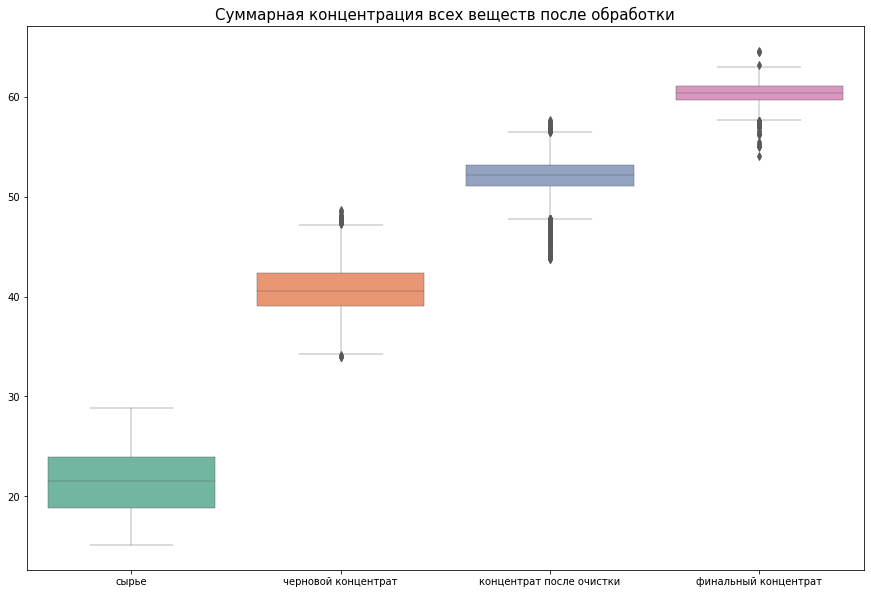

In [40]:
col_1 = ['—Å—ã—Ä—å–µ', '—á–µ—Ä–Ω–æ–≤–æ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç', '–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏', '—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ç']

plt.figure(figsize=(15,10))
sns.boxplot(data=df_clean[col_1], linewidth=0.42, palette="Set2")
plt.title('–°—É–º–º–∞—Ä–Ω–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –≤—Å–µ—Ö –≤–µ—â–µ—Å—Ç–≤ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏', fontsize=15)
plt.show()

In [41]:
df_clean.shape

(6751, 16)

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –æ—á–∏—â–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

**Rougher**

In [42]:
X_train_rougher_clean = X_train_rougher[X_train_rougher.index.isin(df_clean.index)]
X_test_rougher_clean = X_test_rougher[X_test_rougher.index.isin(df_clean.index)]
y_train_rougher_clean = train[['rougher.output.recovery']][train.index.isin(df_clean.index)]
X_train_rougher_clean.shape, X_test_rougher_clean.shape, y_train_rougher_clean.shape

((5343, 22), (1468, 22), (5343, 1))

**Final**

In [43]:
X_train_final_clean = X_train_final[X_train_final.index.isin(df_clean.index)]
X_test_final_clean = X_test_final[X_test_final.index.isin(df_clean.index)]
y_train_final_clean = train[['final.output.recovery']][train.index.isin(df_clean.index)]
X_train_final_clean.shape, X_test_final_clean.shape, y_train_final_clean.shape

((5343, 30), (1468, 30), (5343, 1))

## –ú–æ–¥–µ–ª—å

### sMAPE

In [44]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        total += abs(y_true[i] - y_pred[i]) / ((abs(y_true[i]) + abs(y_pred[i]))/2)
        smape = abs(total*100 / len(y_true))
    return abs(smape)

In [45]:
scorer = make_scorer(smape, greater_is_better=False)

In [46]:
def smape_final(smape_rougher, smape_final):
    smape_final = (0.25 * smape_rougher + 0.75 * smape_final)
    return smape_final

–ü–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å—á—ë—Ç–∞ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–∏.

### Pipeline

–ù–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —ç—Ç–∞–ø–µ –≤—ã—è—Å–Ω–∏–ª–∏:
- –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏–π —Ü–µ–ª–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- nan –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞


In [47]:
def ffill_y (target):
    target = target.ffill()
    return target

def drop_zeros(X_train, y_train):
    y_train = y_train[(y_train != 0).all(1)]  
    X_train = X_train.loc[y_train.index, :]
    return X_train, y_train

In [48]:
y_train_rougher_1 = ffill_y(y_train_rougher)
y_train_final_1 =  ffill_y(y_train_final)

X_train_rougher_pred, y_train_rougher_pred = drop_zeros(X_train_rougher, y_train_rougher_1)
X_train_final_pred, y_train_final_pred = drop_zeros(X_train_final, y_train_final_1)

**–í—ã–±–æ—Ä–∫–∞ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏**

In [49]:
num_pipeline_rougher = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline_final = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [50]:
X_train_rougher_prep = num_pipeline_rougher.fit_transform(X_train_rougher_pred)
X_train_final_prep = num_pipeline_final.fit_transform(X_train_final_pred)

**–ë–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤**

In [51]:
num_pipeline_rougher_clean = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline_final_clean = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [52]:
y_train_rougher_2 = ffill_y(y_train_rougher_clean)
y_train_final_2 =  ffill_y(y_train_final_clean)

X_train_rougher_pred_clean, y_train_rougher_pred_clean = drop_zeros(X_train_rougher_clean, y_train_rougher_2)
X_train_final_pred_clean, y_train_final_pred_clean = drop_zeros(X_train_final_clean, y_train_final_2)

In [53]:
X_train_rougher_prep_clean = num_pipeline_rougher_clean.fit_transform(X_train_rougher_pred_clean)
X_train_final_prep_clean = num_pipeline_final_clean.fit_transform(X_train_final_pred_clean)

### –ü–æ–¥–±–æ—Ä –º–æ–¥–µ–ª–∏

In [54]:
models = [RandomForestRegressor(random_state=1589), LinearRegression(), Lasso(alpha=0.1)]

In [55]:
%%time
results_cross_val = []
for model in models: 
            
    cross_val_score_rougher = cross_val_score(model, 
                                              X_train_rougher_prep_clean, 
                                              y_train_rougher_pred_clean, 
                                              cv=5, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            X_train_final_prep_clean, 
                                            y_train_final_pred_clean, 
                                            cv=5, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
result_clean = pd.DataFrame(results_cross_val)

CPU times: user 1min 12s, sys: 3.49 s, total: 1min 15s
Wall time: 1min 15s


In [56]:
result_clean

model name  cross_val_score_rougher  cross_val_score_final
0  RandomForestRegressor                -6.234666             -10.689302
1       LinearRegression                -6.404057              -9.951867
2                  Lasso                -6.197943              -9.519289

–õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç **Lasso**. –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

In [57]:
%%time
param_grid = [{'fit_intercept': [True, False],
               'alpha': [0.1, 0.2, 0,3],
              'normalize': [True, False]}
             ]

lasso_reg = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search_clean = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search_clean.fit(X_train_rougher_prep_clean, y_train_rougher_pred_clean)

CPU times: user 14.5 s, sys: 26.1 s, total: 40.6 s
Wall time: 40.8 s


GridSearchCV(cv=5, estimator=Lasso(alpha=0.1, max_iter=750, normalize=True),
             param_grid=[{'alpha': [0.1, 0.2, 0, 3],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             return_train_score=True,
             scoring=make_scorer(smape, greater_is_better=False))

In [58]:
grid_search_clean.best_params_

{'alpha': 0.2, 'fit_intercept': True, 'normalize': False}

**Rougher**

In [59]:
final_model = grid_search_clean.best_estimator_

X_test_rougher_pred_clean = num_pipeline_rougher_clean.transform(X_test_rougher_clean)
y_test_clean = ffill_y(df.loc[X_test_rougher_clean.index, 'rougher.output.recovery'])

final_predictions = final_model.predict(X_test_rougher_pred_clean) 

In [60]:
rougher_clean = smape(final_predictions, y_test_clean)
rougher_clean 

8.146431825047463

**Final**

In [61]:
%%time
param_grid = [{'fit_intercept': [True, False],
               'alpha': [0.1, 0.2, 0,3],
              'normalize': [True, False]},
             ]

lasso_reg_final_clean = Lasso(alpha=0.1, normalize=True, max_iter=750)

grid_search_final_clean = GridSearchCV(lasso_reg_final_clean, param_grid, cv=5,
                           scoring=scorer, return_train_score=True)
grid_search_final_clean.fit(X_train_final_prep_clean, y_train_final_pred_clean)

CPU times: user 18.4 s, sys: 35.9 s, total: 54.3 s
Wall time: 54.3 s


GridSearchCV(cv=5, estimator=Lasso(alpha=0.1, max_iter=750, normalize=True),
             param_grid=[{'alpha': [0.1, 0.2, 0, 3],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             return_train_score=True,
             scoring=make_scorer(smape, greater_is_better=False))

In [62]:
final_model_fin = grid_search_final_clean.best_estimator_
X_test_final_pred_clean = num_pipeline_final_clean.transform(X_test_final_clean)
y_test_fin_clean = ffill_y(df.loc[X_test_final_clean.index, 'final.output.recovery'])

final_predictions_final = final_model_fin.predict(X_test_final_pred_clean)


In [63]:
final_clean = smape(final_predictions_final, y_test_fin_clean)
final_clean

9.025618084365028

**–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–∞—è –º–æ–¥–µ–ª—å**

In [64]:
predicted_valid_rog = pd.Series(y_train_rougher_pred_clean['rougher.output.recovery'].mean(), index=y_test_clean.index)
rog = smape(y_test_clean, predicted_valid_rog)

predicted_valid_fin = pd.Series(y_train_final_pred_clean['final.output.recovery'].mean(), index=y_test_fin_clean.index)
fin = smape(y_test_fin_clean, predicted_valid_fin)


print(rog)
print(fin)

7.030476031310527
6.381394978071765


**–í—ã–≤–æ–¥**

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è, –≤—ã—è—Å–Ω–∏–ª–∏ —á—Ç–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–π —Ç–µ—Å—Ç–æ–≤—ã–π —Å–µ—Ç –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –ø–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—é –æ—Ç –æ–±—É—á–∞—é—â–µ–≥–æ.  

–í —Ö–æ–¥–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –≤—ã—è—Å–Ω–∏–ª–∏, —á—Ç–æ –≤ —Å–µ—Ç–∞—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∞–Ω–æ–º–∞–ª–∏–∏ - –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–π –≤–µ—â–µ—Å—Ç–≤, —á—Ç–æ –º–æ–∂–µ—Ç —è–≤–ª—è—Ç—å—Å—è –æ—à–∏–±–∫–æ–π.

–ú—ã –æ–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö –¥–∞–Ω–Ω–∞—Ö - —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤. –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ –º–µ—Ç—Ä–∏–∫–µ sMAPE –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å Lasso, –º–æ–¥–µ–ª—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π.
